# Load and read the data

In [ ]:
# load the pandas
import pandas as pd

In [ ]:
# Read the data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Iris.csv')

In [ ]:
# visualize the samples
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# check the shape of data
data.shape

(150, 6)

In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Defining input features

In [ ]:
# Defining input (X) features
X = data.iloc[:,1:5].values

In [ ]:
# size of X
X.shape

(150, 4)

In [ ]:
# preparing training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(X,test_size=0.20, random_state=0)

In [ ]:
# shape for train and test set
x_train.shape, x_test.shape

((120, 4), (30, 4))

# Initializing and training the K-Means Clustering

In [ ]:
# elbow method to get value of k
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

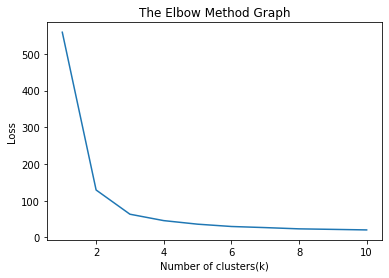

In [ ]:
loss= []

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_train)
    loss.append(kmeans.inertia_)
plt.plot(range(1, 11), loss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Loss')
plt.show()

In [ ]:
# training with k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)

KMeans(n_clusters=3)

# Predecting and plotting the clusters

In [ ]:
# random predection
kmeans.predict([[7.3, 2.9, 6.3, 1.8]])

array([2], dtype=int32)

In [ ]:
# predict clusters
y_predict = kmeans.predict(x_test)
y_predict

array([0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1], dtype=int32)

In [ ]:
# get the cluster centers
centres = kmeans.cluster_centers_

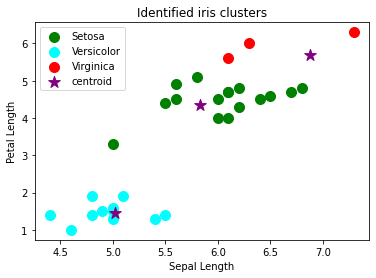

In [ ]:
# plotting the clusters
plt.scatter(x_test[y_predict == 0, 0], x_test[y_predict == 0, 2], s = 100, c = 'green', label = 'Setosa')
plt.scatter(x_test[y_predict == 1, 0], x_test[y_predict == 1, 2], s = 100, c = 'cyan', label = 'Versicolor')
plt.scatter(x_test[y_predict == 2, 0], x_test[y_predict == 2, 2], s = 100, c = 'red', label = 'Virginica')
plt.scatter(centres[:,0],centres[:,2],c='purple',s=150, marker='*', label='centroid')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Identified iris clusters')
plt.legend()